# Requirements

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from numba import complex128, njit, uint8, void
import numpy as np

# Pure Python

This is a straightforward implementation of the Julia Set computation in pure Python.

In [2]:
def julia_set(domain, iterations):
    max_iters = 255
    max_norm = 2.0
    c = -0.622772 + 0.42193j
    for i in range(len(domain)):
        z = domain[i]
        while (iterations[i] < max_iters and
               abs(z) <= max_norm):
            z = z**2 + c
            iterations[i] += 1

The domain of this function is a (discretized) part of the complex plane, the real and the imaginary parts are in $[-1.8, 1.8]$.

In [3]:
nr_points = 200
x = np.linspace(-1.8, 1.8, nr_points)
X, Y = np.meshgrid(x, x)
Z = X + 1j*Y
iterations = np.zeros(Z.shape, dtype=np.uint8)

In [4]:
julia_set(Z.reshape((-1, )), iterations.reshape((-1, )))

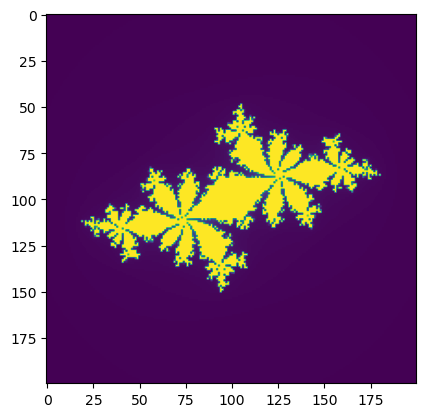

In [5]:
plt.imshow(iterations);

Timing the function for a $200 \times 200$ matrix.

In [6]:
%timeit julia_set(Z.flatten(), np.zeros(Z.size, dtype=np.uint8))

3.29 s ± 122 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Numba JIT

To improve perfomance, we can add the `njit` decorator.

In [7]:
@njit
def julia_set_jit(domain, iterations):
    max_iters = 255
    max_norm = 2.0
    c = -0.622772 + 0.42193j
    for i in range(len(domain)):
        z = domain[i]
        while (iterations[i] < max_iters and
               abs(z) <= max_norm):
            z = z**2 + c
            iterations[i] += 1

In [8]:
%timeit julia_set_jit(Z.flatten(), np.zeros(Z.size, dtype=np.uint8))

8.88 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The compute time is orders of magnitude less thanks to the conversion of the Python code into C++.

We should of course also verify we get the same result.

In [9]:
iterations = np.zeros(Z.shape, dtype=np.uint8)

In [10]:
julia_set_jit(Z.reshape((-1, )), iterations.reshape((-1, )))

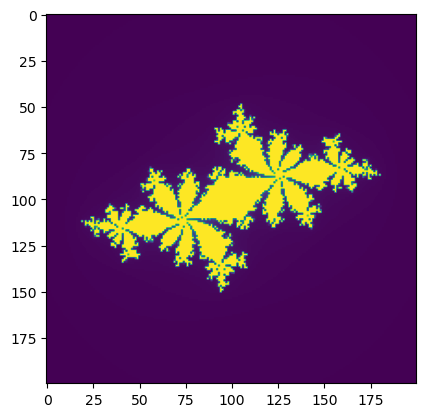

In [11]:
plt.imshow(iterations);

# Numba eager JIT

To improve performance, we can add type information to the decorator.

In [12]:
@njit(void(complex128[:], uint8[:]))
def julia_set_eager_jit(domain, iterations):
    max_iters = 255
    max_norm = 2.0
    c = -0.622772 + 0.42193j
    for i in range(len(domain)):
        z = domain[i]
        while (iterations[i] < max_iters and
               abs(z) <= max_norm):
            z = z**2 + c
            iterations[i] += 1

In [13]:
%timeit julia_set_eager_jit(Z.reshape((-1, )), np.zeros(Z.size, dtype=np.uint8))

9.25 ms ± 714 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In this case, adding type information doesn't help.